# Exersice 1

In [5]:
# TensorFlow + Keras for Multilayer Perceptron Models (MLP) in deep learning
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from tensorflow.keras.utils import plot_model

# load the dataset
path = 'https://pages.mtu.edu/~cai/sat4520/iris.csv'
df = read_csv(path, header=0)

# slit into inut and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("Train/Test data shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

Train/Test data shape:  (112, 4) (38, 4) (112,) (38,)


Epoch 1/100
3/3 [==============================] - 1s 107ms/step - loss: 3.5391 - accuracy: 0.3077 - val_loss: 2.7827 - val_accuracy: 0.3824
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 3.3491 - accuracy: 0.3077 - val_loss: 2.6095 - val_accuracy: 0.3824
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 3.1549 - accuracy: 0.3077 - val_loss: 2.4525 - val_accuracy: 0.3824
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 2.9931 - accuracy: 0.3077 - val_loss: 2.3057 - val_accuracy: 0.3824
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 2.8351 - accuracy: 0.3077 - val_loss: 2.1735 - val_accuracy: 0.3824
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 2.7000 - accuracy: 0.3077 - val_loss: 2.0551 - val_accuracy: 0.3824
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 2.5661 - accuracy: 0.3077 - val_loss: 1.9487 - val_accuracy: 0.3824
Epoch 8/100
3/3 [==

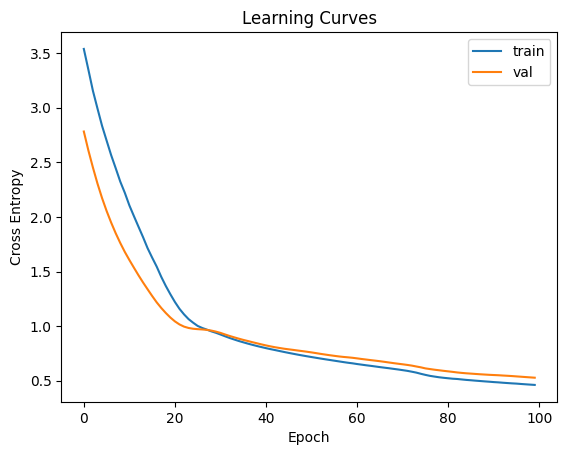

1/1 [==============================] - 0s 79ms/step
Predicted: [[0.85491943 0.12360381 0.02147675]] (class=0)


In [6]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model; try verbose=1
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.3)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

# show model
model.summary()
plot_model(model, 'model.png', show_shapes=True)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

# Exersice 2

In [8]:
# pytorch mlp for multiclass classification
from numpy import vstack
from numpy import argmax
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import Module
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

# define parameters
learning_rate = 0.01
n_epochs = 1000

# dataset definition
class CSVDataset(Dataset):
   # load the dataset
   def __init__(self, path):
       # load the csv file as a dataframe
       df = read_csv(path, header=1)
       # store the inputs and outputs
       self.X = df.values[:, :-1]
       self.y = df.values[:, -1]
       # ensure input data is floats
       self.X = self.X.astype('float32')
       # label encode target and ensure the values are floats
       self.y = LabelEncoder().fit_transform(self.y)

   # number of rows in the dataset
   def __len__(self):
       return len(self.X)

   # get a row at an index
   def __getitem__(self, idx):
       return [self.X[idx], self.y[idx]]

   # get indexes for train and test rows
   def get_splits(self, n_test=0.33):
       # determine sizes
       test_size = round(n_test * len(self.X))
       train_size = len(self.X) - test_size
       # calculate the split
       return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
   # define model elements
   def __init__(self, n_inputs):
       super(MLP, self).__init__()
       # input to first hidden layer
       self.hidden1 = Linear(n_inputs, 10)
       kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
       self.act1 = ReLU()
       # second hidden layer
       self.hidden2 = Linear(10, 8)
       kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
       self.act2 = ReLU()
       # third hidden layer and output
       self.hidden3 = Linear(8, 3)
       xavier_uniform_(self.hidden3.weight)
       self.act3 = Softmax(dim=1)

   # forward propagate input
   def forward(self, X):
       # input to first hidden layer
       X = self.hidden1(X)
       X = self.act1(X)
       # second hidden layer
       X = self.hidden2(X)
       X = self.act2(X)
       # output layer
       X = self.hidden3(X)
       X = self.act3(X)
       return X

# prepare the dataset
def prepare_data(path):
   # load the dataset
   dataset = CSVDataset(path)
   # calculate split
   train, test = dataset.get_splits()
   # prepare data loaders
   train_dl = DataLoader(train, batch_size=32, shuffle=True)
   test_dl = DataLoader(test, batch_size=1024, shuffle=False)
   return train_dl, test_dl

# train the model
def train_model(train_dl, model):
   # define the optimization
   criterion = CrossEntropyLoss()
   optimizer = SGD(model.parameters(), lr=learning_rate, momentum=(1-learning_rate))
   # enumerate epochs
   for epoch in range(n_epochs):
       # enumerate mini batches
       for i, (inputs, targets) in enumerate(train_dl):
           # clear the gradients
           optimizer.zero_grad()
           # compute the model output
           yhat = model(inputs)
           # calculate loss
           loss = criterion(yhat, targets)
           # credit assignment
           loss.backward()
           # update model weights
           optimizer.step()

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

# --- Main program here ---
# prepare the data
path = 'https://pages.mtu.edu/~cai/sat4520/iris.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))

# define the network
model = MLP(4)

# train the model
train_model(train_dl, model)

acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)

# make a single prediction
row = [5.1,3.5,1.4,0.2]

yhat = predict(row, model)
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

100 49
Accuracy: 0.735
Predicted: [[1. 0. 0.]] (class=0)
